**Rule-Based Classification and Customer Segmentation Assignment**

Business Problem

A mobile application company aims to develop new customer profiles by leveraging demographic and usage information. The objective is to segment these customers and estimate the average revenue that new customers can potentially generate for the company.
Dataset

This dataset encompasses purchase transactions made within a mobile application, along with certain demographic details of the users.

Variables

PRICE: The expenditure amount by the user.
PLATFORM: The type of device the user connects from (e.g., Android, iOS).
GENDER: The gender of the user (e.g., Male, Female).
REGION: The country of the user (e.g., USA, FRA, TUR, DEU, etc.).
AGE: The age of the user.


**Task 1: Answer the Following Questions**
* Read the customers.csv file and display general information about the dataset.
* How many unique PLATFORMs exist? What are their frequencies?
* How many unique PRICE values exist?
* How many sales were made for each PRICE value?
* How many sales were made from each country?
* What is the total revenue generated from sales in each country?
* What are the sales counts according to PLATFORM types?
* What are the average PRICE values for each country?
* What are the average PRICE values for each PLATFORM?
* What are the average PRICE values based on the REGION-PLATFORM breakdown?

In [48]:
import pandas as pd
import seaborn as sns
import numpy as np




df = pd.read_csv("customers.csv")
df1 = df.copy()

In [10]:
print(df.head())
print(df.tail())



   PRICE PLATFORM GENDER REGION  AGE
0     39  android   male    bra   17
1     39  android   male    bra   17
2     49  android   male    bra   17
3     29  android   male    tur   17
4     49  android   male    tur   17
      PRICE PLATFORM  GENDER REGION  AGE
4995     29  android  female    bra   31
4996     29  android  female    bra   31
4997     29  android  female    bra   31
4998     39  android  female    bra   31
4999     29  android  female    bra   31


In [11]:
df.shape

(5000, 5)

In [16]:
df["PLATFORM"].unique()

array(['android', 'ios'], dtype=object)

In [20]:
df["PLATFORM"].value_counts()

PLATFORM
android    2974
ios        2026
Name: count, dtype: int64

In [21]:
df["PRICE"].unique()

array([39, 49, 29, 19, 59,  9], dtype=int64)

In [22]:
df["PRICE"].value_counts()

PRICE
29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: count, dtype: int64

In [23]:
df["REGION"].value_counts()

REGION
usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: count, dtype: int64

In [24]:
df.groupby("REGION")[["PRICE"]].sum()

,PRICE
REGION,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


In [26]:
df["PLATFORM"].value_counts()

PLATFORM
android    2974
ios        2026
Name: count, dtype: int64

In [28]:
df.groupby("REGION")[["PRICE"]].mean()

,PRICE
REGION,
bra,34.327540
can,33.608696
deu,34.032967
fra,33.587459
tur,34.787140
usa,34.007264


In [29]:
df.groupby("PLATFORM")[["PRICE"]].mean()

,PRICE
PLATFORM,
android,34.174849
ios,34.069102


In [36]:
df.groupby(["REGION","PLATFORM"]).agg({"PRICE" : "mean"})

PRICE
REGION PLATFORM           
bra    android   34.387029
       ios       34.222222
can    android   33.330709
       ios       33.951456
deu    android   33.869888
       ios       34.268817
fra    android   34.312500
       ios       32.776224
tur    android   36.229437
       ios       33.272727
usa    android   33.760357
       ios       34.371703

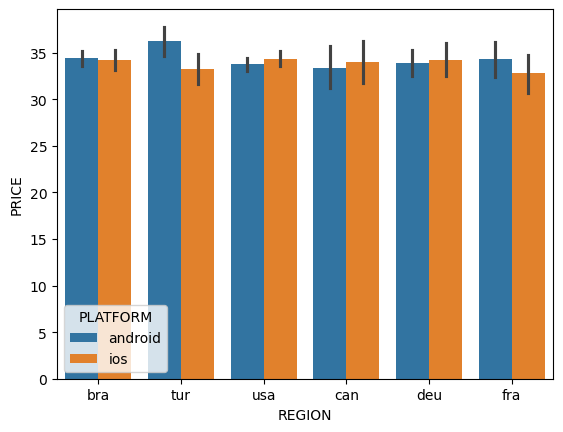

In [38]:
sns.barplot(x = "REGION", y = "PRICE", hue = "PLATFORM", data = df);

**Task 2:What are the average revenues based on the breakdown of REGION, PLATFORM, GENDER, and AGE?**

In [39]:
df.groupby(["REGION","PLATFORM", "GENDER","AGE"]).agg({"PRICE" : "mean"})

PRICE
REGION PLATFORM GENDER AGE           
bra    android  female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
...                               ...
usa    ios      male   42   30.250000
                       50   39.000000
                       53   34.000000
                       55   29.000000
                       59   46.500000

[348 rows x 1 columns]

**Task 3: Sort the output in descending order based on PRICE and save the results as agg_df.**

In [64]:
agg_df1 = df.sort_values(by="PRICE", ascending= False)
agg_df1

,PRICE,PLATFORM,GENDER,REGION,AGE
4503,59,ios,male,fra,15
995,59,android,male,usa,47
3343,59,android,male,tur,24
2294,59,android,male,fra,15
3716,59,ios,male,bra,16
...,...,...,...,...,...
4757,9,ios,male,tur,17
1625,9,ios,female,tur,38
2490,9,ios,male,bra,17
4397,9,android,male,usa,22


**Task 4: Define the index names as variables. (Hint: Use reset_index()).**

In [65]:
agg_df1 = df.reset_index()
agg_df1.head()

,index,PRICE,PLATFORM,GENDER,REGION,AGE
0,0,39,android,male,bra,17
1,1,39,android,male,bra,17
2,2,49,android,male,bra,17
3,3,29,android,male,tur,17
4,4,49,android,male,tur,17


**Task 5:Convert the AGE variable into a categorical variable and add it to agg_df.**

In [66]:
agg_df1['AGE'] = pd.cut(agg_df1['AGE'], bins=[0, 18, 23, 30, 40, 70], labels=['0_18', '19_23', '24_30', '31_40', '41_70'], right=True)

In [67]:
agg_df1.head()

,index,PRICE,PLATFORM,GENDER,REGION,AGE
0,0,39,android,male,bra,0_18
1,1,39,android,male,bra,0_18
2,2,49,android,male,bra,0_18
3,3,29,android,male,tur,0_18
4,4,49,android,male,tur,0_18


**Task 6: Create new customer groups based on a tier system. Add a new variable: customer profile.**



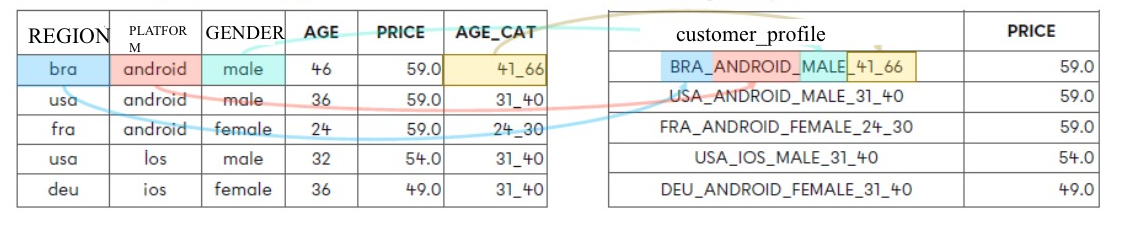

In [77]:
from IPython.display import Image
Image("ekranresmi.png")




In [78]:

df1["customer_profile"] = df1["REGION"].str.upper() + "_" + df1["PLATFORM"].str.upper() + "_" + df1["GENDER"].str.upper() + "_"
df2 = df1.groupby("customer_profile", as_index=False)["PRICE"].mean()
df2.head()


,customer_profile,PRICE
0,BRA_ANDROID_FEMALE_,34.684647
1,BRA_ANDROID_MALE_,34.084388
2,BRA_IOS_FEMALE_,34.323194
3,BRA_IOS_MALE_,34.126354
4,CAN_ANDROID_FEMALE_,31.750000


**Task 7: Segment the new customers (e.g., USA_ANDROID_MALE_0_18) based on PRICE into 4 segments.**

* Rename the segments with SEGMENT and add it as a new variable to the agg_df.
* Describe the segments (perform a group by to calculate the mean, max, and sum of the prices for each segment).


In [115]:
agg_df1["SEGMENT"] = pd.cut(agg_df1["PRICE"], bins=[8, 22, 35, 47, 60], labels=['8_21', "22_34", '35_47', '47_60'], right=True)
agg_df1.head()

,index,PRICE,PLATFORM,GENDER,REGION,AGE,SEGMENT
0,0,39,android,male,bra,0_18,35_47
1,1,39,android,male,bra,0_18,35_47
2,2,49,android,male,bra,0_18,47_60
3,3,29,android,male,tur,0_18,22_34
4,4,49,android,male,tur,0_18,47_60


In [116]:
agg_df1.groupby("SEGMENT")[["PRICE"]].describe()

C:\Users\Behiye\AppData\Local\Temp\ipykernel_12964\51172522.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df1.groupby("SEGMENT")[["PRICE"]].describe()


PRICE                                                   
          count       mean       std   min   25%   50%   75%   max
SEGMENT                                                           
8_21     1192.0  17.322148  3.738323   9.0  19.0  19.0  19.0  19.0
22_34    1305.0  29.000000  0.000000  29.0  29.0  29.0  29.0  29.0
35_47    1260.0  39.000000  0.000000  39.0  39.0  39.0  39.0  39.0
47_60    1243.0  50.705551  3.762711  49.0  49.0  49.0  49.0  59.0

**Task 8: Classify new customers and predict how much revenue they can generate.**

* For a 33-year-old Turkish woman using Android: What segment does she belong to, and how much revenue is expected to be generated on average?
* For a 35-year-old French woman using iOS: What segment does she belong to, and how much revenue is expected to be generated on average?

In [117]:

new_customers = pd.DataFrame({
    "REGION": ["tur", "fra"],  
    "PLATFORM": ["android", "ios"],  
    "GENDER": ["female", "female"],  
    "AGE": [33, 35]  
})

def classify_segment(age):
    if 8 <= age <= 21:
        return "8_21"
    elif 22 <= age <= 34:
        return "22_34"
    elif 35 <= age <= 47:
        return "35_47"
    elif 47 <= age <= 60:
        return "47_60"
    else:
        return "OTHER"


new_customers["SEGMENT"] = new_customers["AGE"].apply(classify_segment)


segment_prices = agg_df1.groupby("SEGMENT")[["PRICE"]].mean().reset_index()


new_customers = new_customers.merge(segment_prices, on="SEGMENT", how="left")


new_customers[["REGION", "PLATFORM", "GENDER", "AGE", "SEGMENT", "PRICE"]]


C:\Users\Behiye\AppData\Local\Temp\ipykernel_12964\2786053358.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_prices = agg_df1.groupby("SEGMENT")[["PRICE"]].mean().reset_index()


,REGION,PLATFORM,GENDER,AGE,SEGMENT,PRICE
0,tur,android,female,33,22_34,29.0
1,fra,ios,female,35,35_47,39.0
